# Import Cell

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Upload the Data and Read the .csv File

In [117]:
df = pd.read_csv("salary_results.csv")

#### Display the first few rows of the dataset

In [118]:
df.shape

(4880, 8)

In [119]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Title,Location,Description,nTile10,nTile25,nTile50,nTile75,nTile90
0,Python Developer,"New York, NY",Frontend Developer I develops user interfaces ...,60654.0,67134,74252,79078,83472.0
1,Python Developer,"Los Angeles, CA",Frontend Developer I develops user interfaces ...,57850.0,64030,70819,75422,79613.0
2,Python Developer,"Chicago, IL",Frontend Developer I develops user interfaces ...,54474.0,60294,66687,71022,74968.0
3,Python Developer,"Houston, TX",Frontend Developer I develops user interfaces ...,52085.0,57650,63763,67907,71680.0
4,Python Developer,"Phoenix, AZ",Frontend Developer I develops user interfaces ...,51307.0,56788,62809,66892,70608.0


#### Summarize the dataset structure

In [120]:
print("\nDataset structure and data types:")
df.info()


Dataset structure and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4880 entries, 0 to 4879
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        4880 non-null   object 
 1   Location     4880 non-null   object 
 2   Description  1830 non-null   object 
 3   nTile10      4575 non-null   float64
 4   nTile25      4880 non-null   int64  
 5   nTile50      4880 non-null   int64  
 6   nTile75      4880 non-null   int64  
 7   nTile90      4575 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 305.1+ KB


#### Generate summary statistics for numerical columns

In [121]:
print("\nSummary statistics for numerical columns:")
print(df.describe())



Summary statistics for numerical columns:
             nTile10        nTile25        nTile50        nTile75  \
count    4575.000000    4880.000000    4880.000000    4880.000000   
mean    86933.315847   95712.575410  110750.523566  127035.982582   
std     21055.377639   25198.289449   29009.707864   37426.844841   
min     44660.000000   40113.000000   46409.000000   53566.000000   
25%     67955.000000   73413.000000   94176.000000  104576.000000   
50%     92105.000000  101875.000000  118313.000000  131618.500000   
75%    102328.500000  114437.000000  131662.000000  150253.000000   
max    134638.000000  154923.000000  178049.000000  248364.000000   

             nTile90  
count    4575.000000  
mean   146608.149727  
std     44444.473465  
min     61461.000000  
25%    125588.500000  
50%    145972.000000  
75%    167357.000000  
max    318098.000000  


#### Check for missing values

In [122]:
print("\nMissing values in each column:")
print(df.isnull().sum())  ## or df.isna().sum()


Missing values in each column:
Title             0
Location          0
Description    3050
nTile10         305
nTile25           0
nTile50           0
nTile75           0
nTile90         305
dtype: int64


### Check for duplicate rows

In [123]:
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


#### Unique Values

In [124]:
print("Unique job titles:")
print(df['Title'].nunique(), "unique titles")
print("\nUnique locations:")
print(df['Location'].nunique(), "unique locations")

Unique job titles:
16 unique titles

Unique locations:
305 unique locations


#### Value Count

In [125]:
print("\nMost common job titles:")
print(df['Title'].value_counts().head())

print("\nMost common locations:")
print(df['Location'].value_counts().head())



Most common job titles:
Title
Python Developer             305
Data Scientist               305
Software Engineer            305
Machine Learning Engineer    305
Business Analyst             305
Name: count, dtype: int64

Most common locations:
Location
New York, NY            16
Sterling Heights, MI    16
Elizabeth, NJ           16
Concord, CA             16
Stamford, CT            16
Name: count, dtype: int64


# Data Cleaning

#### Handle Missing Values

In [126]:
print("\nMissing values per column:")
print(df.isna().sum())
print(df.head())
# Example: Drop rows with missing values
#clean_df = df.dropna()


Missing values per column:
Title             0
Location          0
Description    3050
nTile10         305
nTile25           0
nTile50           0
nTile75           0
nTile90         305
dtype: int64
              Title         Location  \
0  Python Developer     New York, NY   
1  Python Developer  Los Angeles, CA   
2  Python Developer      Chicago, IL   
3  Python Developer      Houston, TX   
4  Python Developer      Phoenix, AZ   

                                         Description  nTile10  nTile25  \
0  Frontend Developer I develops user interfaces ...  60654.0    67134   
1  Frontend Developer I develops user interfaces ...  57850.0    64030   
2  Frontend Developer I develops user interfaces ...  54474.0    60294   
3  Frontend Developer I develops user interfaces ...  52085.0    57650   
4  Frontend Developer I develops user interfaces ...  51307.0    56788   

   nTile50  nTile75  nTile90  
0    74252    79078  83472.0  
1    70819    75422  79613.0  
2    66687    71022 

In [127]:
# Or fill missing values

df["nTile10"].fillna(df['nTile10'].mean(), inplace=True)
df["nTile90"].fillna(df['nTile90'].mean(), inplace=True)
df["Description"].fillna("No description available", inplace=True)

print(df.isna().sum())


Title          0
Location       0
Description    0
nTile10        0
nTile25        0
nTile50        0
nTile75        0
nTile90        0
dtype: int64


C:\Users\coppe\AppData\Local\Temp\ipykernel_19752\54447930.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["nTile10"].fillna(df['nTile10'].mean(), inplace=True)
C:\Users\coppe\AppData\Local\Temp\ipykernel_19752\54447930.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

#### Handle Duplicates

In [38]:
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

# Drop duplicates
clean_df = clean_df.drop_duplicates()



Number of duplicate rows:
0


#### Standardize Text Data

In [40]:
df['Title'] = df['Title'].str.strip().str.title()
df['Location'] = df['Location'].str.strip().str.title()

#### Verify Data Types

In [41]:
percentiles = ['nTile10', 'nTile25', 'nTile50', 'nTile75', 'nTile90']

In [46]:
print("\nColumn data types:")
print(df.dtypes)
# Convert salary percentiles to numeric if needed
df[percentiles] = df[percentiles].apply(pd.to_numeric, errors='coerce')


Column data types:
Title           object
Location        object
Description     object
nTile10        float64
nTile25          int64
nTile50          int64
nTile75          int64
nTile90        float64
dtype: object


 #### Address Outliers

 86,933


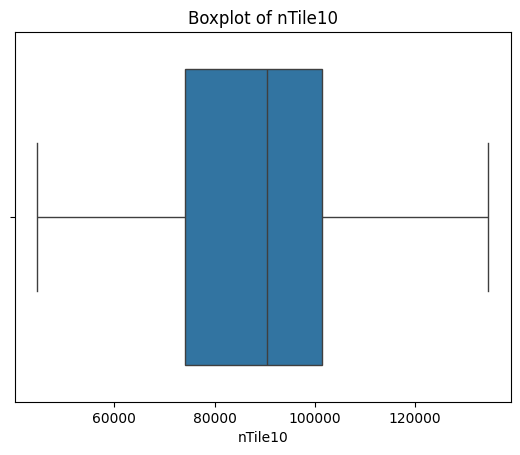

 95,713


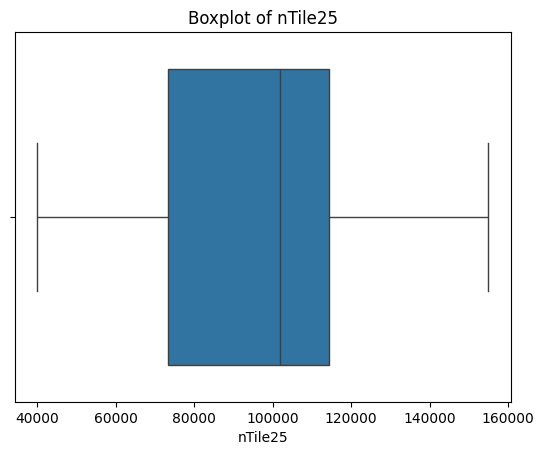

 110,751


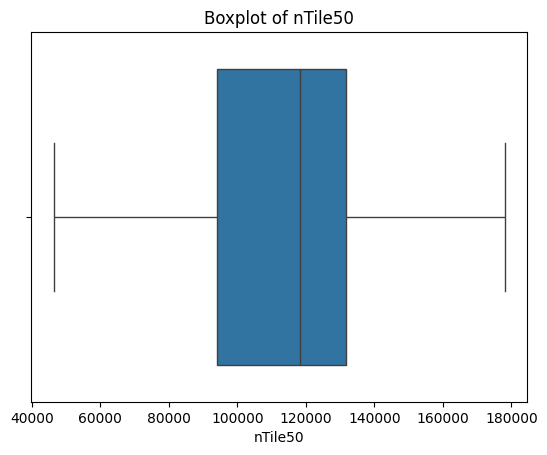

 127,036


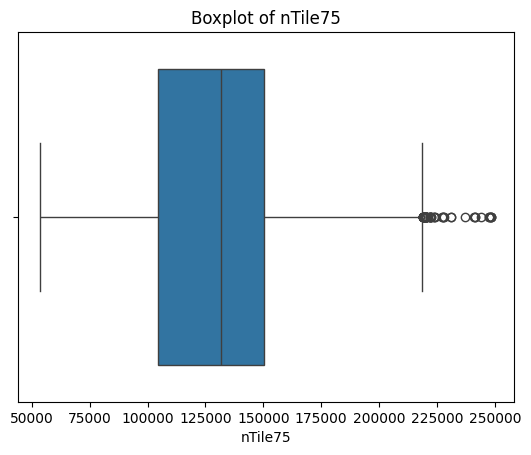

 146,608


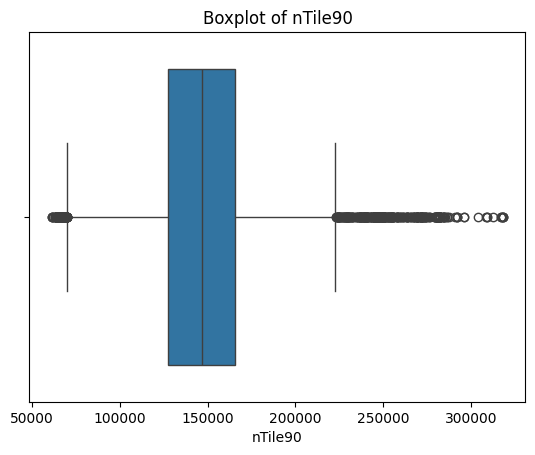

In [55]:
for col in percentiles:
    print(f"{df[col].mean(): ,.0f}")
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

#### Ensure Column Consistency


In [56]:
df.rename(columns={'Title': 'Job Title', 'Location': 'Job Location', 'Description': 'Job Description'}, inplace=True)

In [57]:
df.head()

,Job Title,Job Location,Job Description,nTile10,nTile25,nTile50,nTile75,nTile90
0,Python Developer,"New York, Ny",Frontend Developer I develops user interfaces ...,60654.0,67134,74252,79078,83472.0
1,Python Developer,"Los Angeles, Ca",Frontend Developer I develops user interfaces ...,57850.0,64030,70819,75422,79613.0
2,Python Developer,"Chicago, Il",Frontend Developer I develops user interfaces ...,54474.0,60294,66687,71022,74968.0
3,Python Developer,"Houston, Tx",Frontend Developer I develops user interfaces ...,52085.0,57650,63763,67907,71680.0
4,Python Developer,"Phoenix, Az",Frontend Developer I develops user interfaces ...,51307.0,56788,62809,66892,70608.0


* Notice, the data that we've scraped is very clean

#### Distribution Analysis

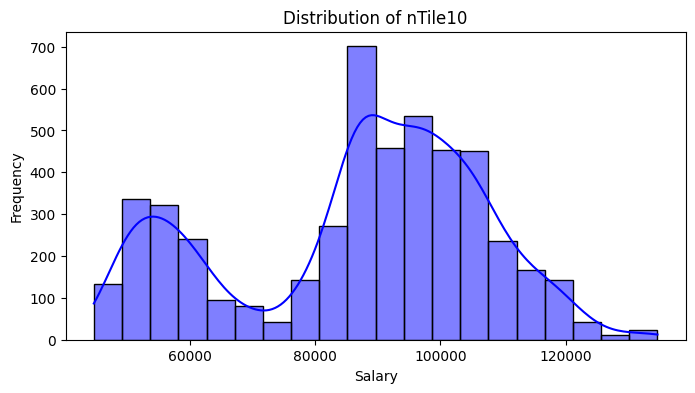

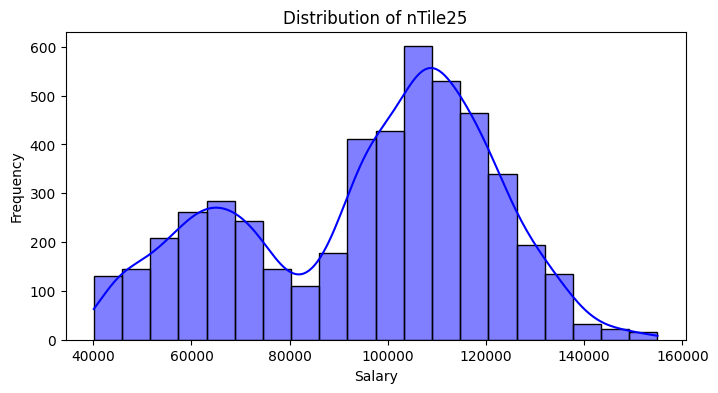

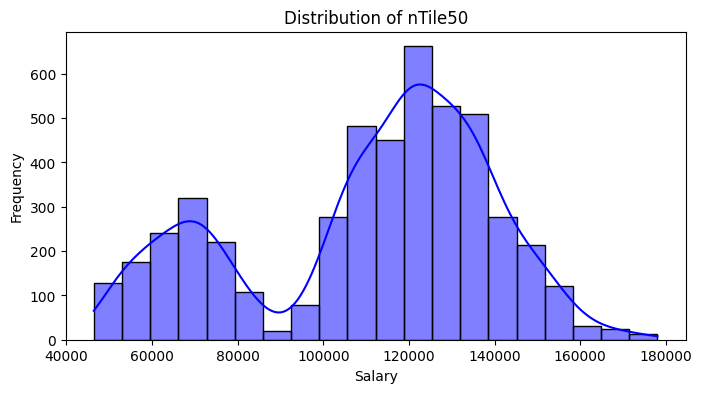

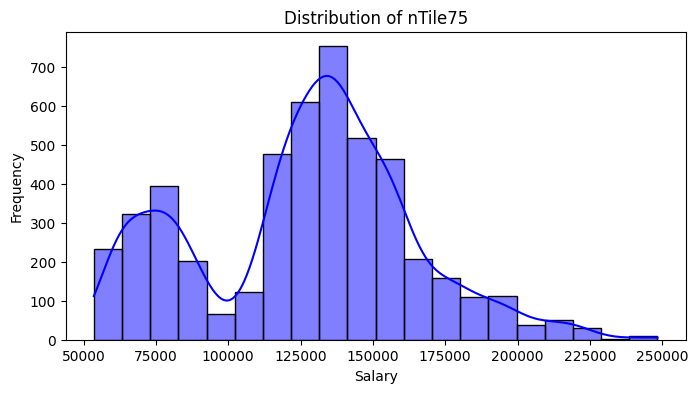

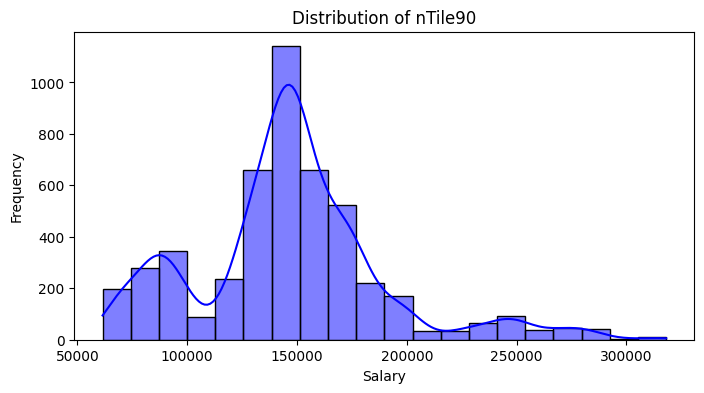

In [58]:
# List of salary percentiles

for col in percentiles:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=20, color="blue")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Salary")
    plt.ylabel("Frequency")
    plt.show()


#### Relationship Analysis

In [61]:
# Select only numerical columns for correlation analysis
numerical_columns =df.select_dtypes(include=['int64', 'float64'])


Correlation matrix:
          nTile10   nTile25   nTile50   nTile75   nTile90
nTile10  1.000000  0.848238  0.647596  0.449419  0.349272
nTile25  0.848238  1.000000  0.899200  0.736734  0.458591
nTile50  0.647596  0.899200  1.000000  0.958010  0.763276
nTile75  0.449419  0.736734  0.958010  1.000000  0.883784
nTile90  0.349272  0.458591  0.763276  0.883784  1.000000


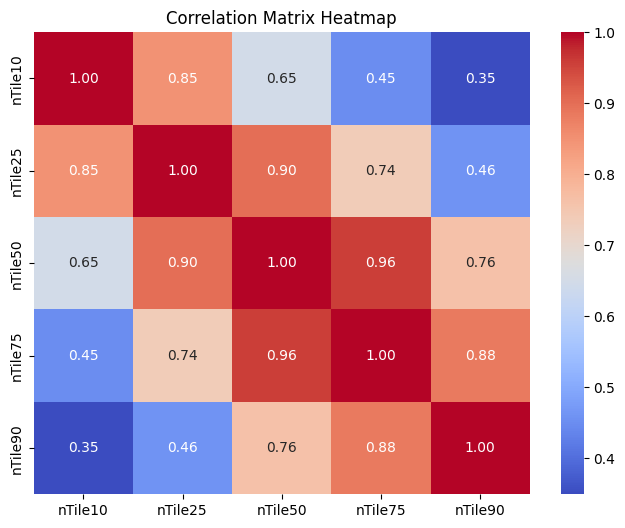

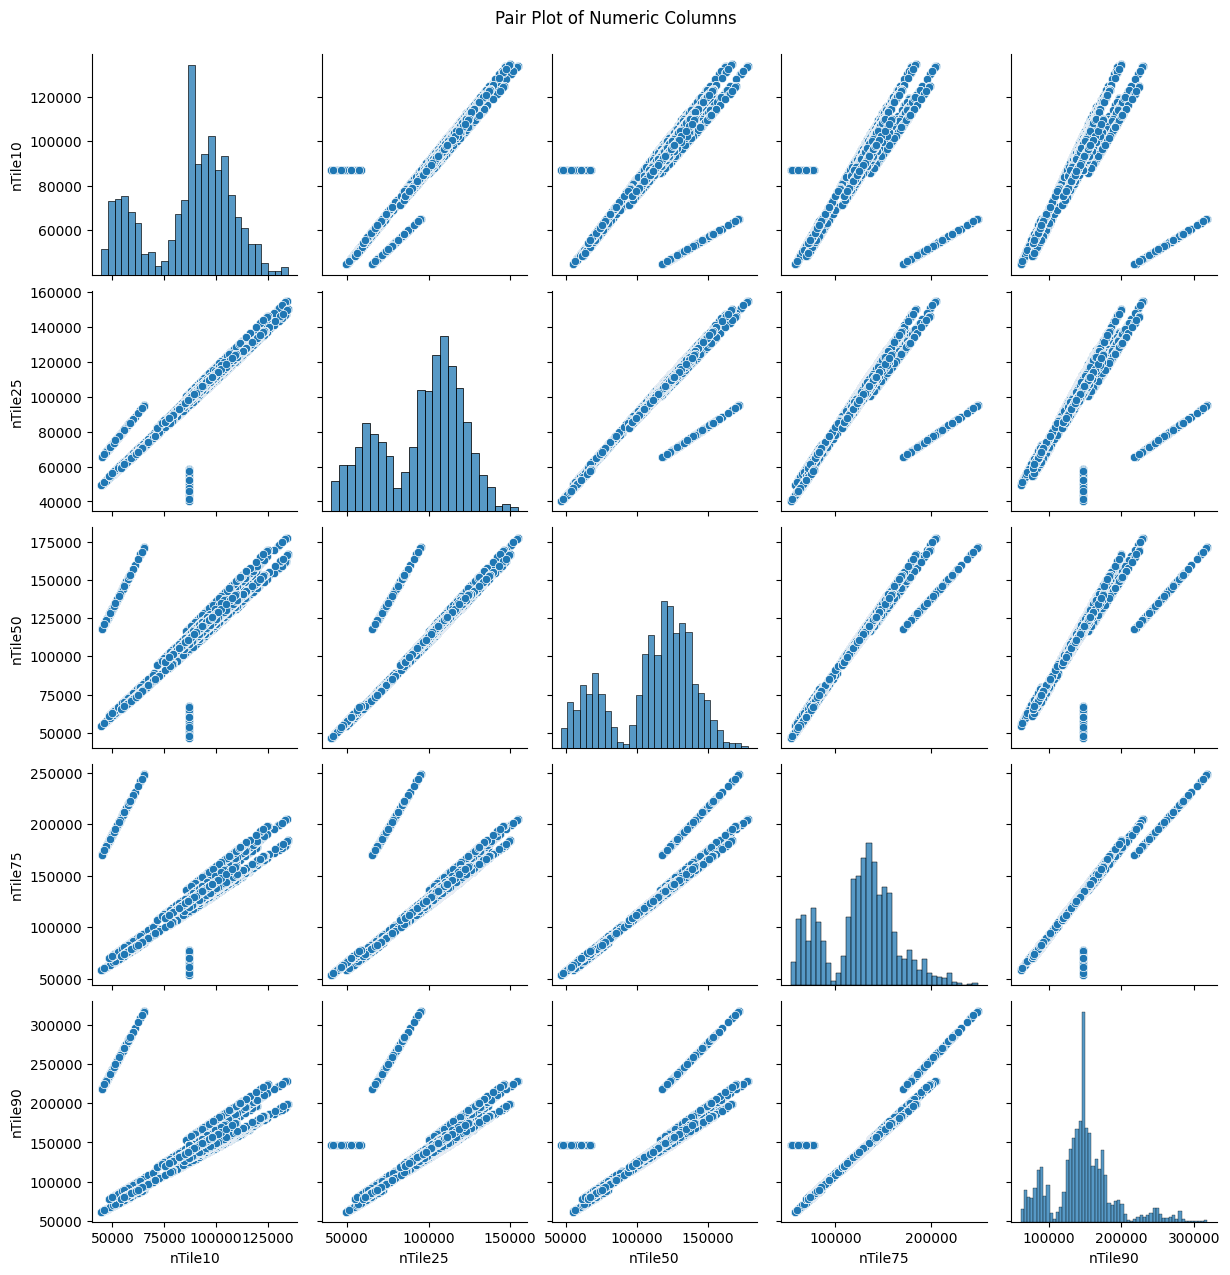

In [63]:
# Compute the correlation matrix
print("\nCorrelation matrix:")
correlation_matrix = numerical_columns.corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Pair Plot for Relationship Exploration
sns.pairplot(df[percentiles])  
plt.suptitle("Pair Plot of Numeric Columns", y=1.02)  
plt.show()


## Segmentation Analysis

#### Grouping Data by a Categorical Column

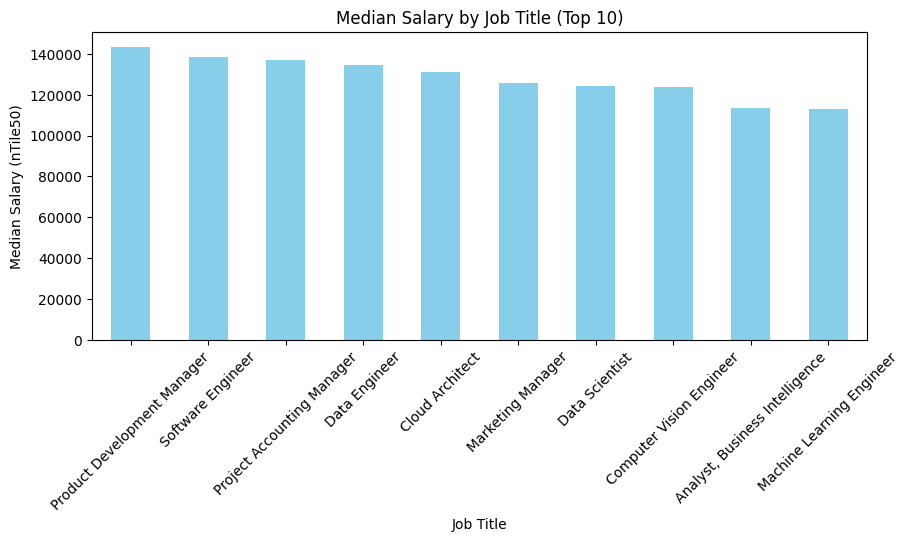

In [64]:
# Grouping
grouped_data = df.groupby('Job Title')[percentiles].mean().sort_values(by='nTile50', ascending=False) 

# Visualizing segmented data
plt.figure(figsize=(10, 4))
grouped_data['nTile50'].head(10).plot(kind='bar', color='skyblue') 
plt.title("Median Salary by Job Title (Top 10)")
plt.xlabel("Job Title")
plt.ylabel("Median Salary (nTile50)")
plt.xticks(rotation=45)
plt.show()


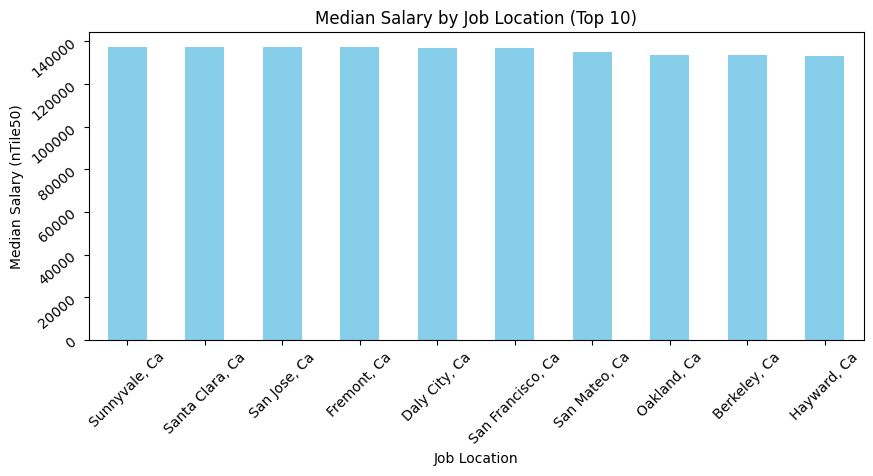

In [67]:
# Grouping
grouped_data = df.groupby('Job Location')[percentiles].mean().sort_values(by='nTile50', ascending=False) 

# Visualizing segmented data
plt.figure(figsize=(10, 4))
grouped_data['nTile50'].head(10).plot(kind='bar', color='skyblue') 
plt.title("Median Salary by Job Location (Top 10)")
plt.xlabel("Job Location")
plt.ylabel("Median Salary (nTile50)")
plt.xticks(rotation=45)
plt.yticks(rotation=40)
plt.show()

#### Comparison of Numeric Data Across Categories


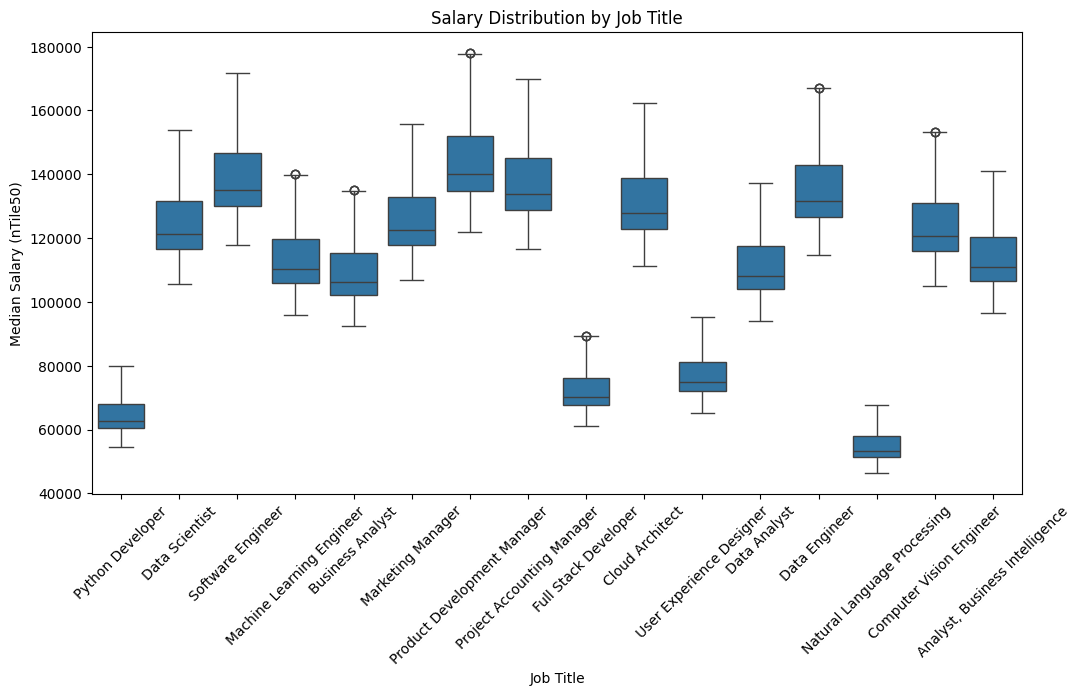

In [75]:
# Boxplot for salary percentiles across categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='Job Title', y='nTile50', data=df) 
plt.title("Salary Distribution by Job Title")
plt.xlabel("Job Title")
plt.ylabel("Median Salary (nTile50)")
plt.xticks(rotation=45)
plt.show()


In [81]:
top_10_locations = df['Job Location'].value_counts().head(10).index
print(top_10_locations)

Index(['New York, Ny', 'Sterling Heights, Mi', 'Elizabeth, Nj', 'Concord, Ca',
       'Stamford, Ct', 'New Haven, Ct', 'Santa Clara, Ca', 'Columbia, Sc',
       'Kent, Wa', 'Round Rock, Tx'],
      dtype='object', name='Job Location')


In [84]:
filtered_data = df[df['Job Location'].isin(top_10_locations)]

#### Bar Plot for Top 10 Locations

Job Location
Santa Clara, Ca         137370.8125
New York, Ny            127848.0000
Stamford, Ct            125658.8750
Elizabeth, Nj           123688.5000
Concord, Ca             122922.3750
New Haven, Ct           118106.1875
Kent, Wa                117449.5625
Sterling Heights, Mi    110006.2500
Round Rock, Tx          107926.5000
Columbia, Sc            101468.3125
Name: nTile50, dtype: float64


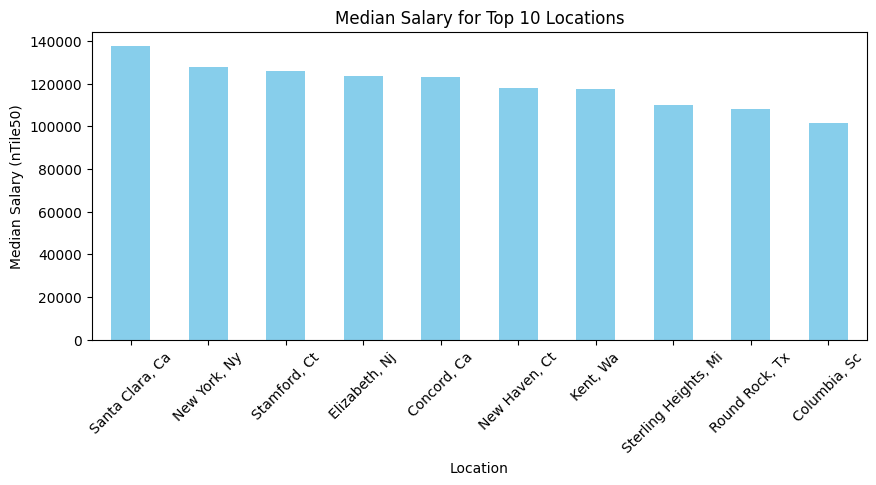

In [85]:
# Aggregate the median salary for the top 10 locations
location_salaries = filtered_data.groupby('Job Location')['nTile50'].mean().sort_values(ascending=False)
print(location_salaries)

# Plot the bar chart
plt.figure(figsize=(10, 4))
location_salaries.plot(kind='bar', color='skyblue')
plt.title("Median Salary for Top 10 Locations")
plt.xlabel("Location")
plt.ylabel("Median Salary (nTile50)")
plt.xticks(rotation=45)
plt.show()


#### Trend Analysis

nTile10     86933.315847
nTile25     95712.575410
nTile50    110750.523566
nTile75    127035.982582
nTile90    146608.149727
dtype: float64


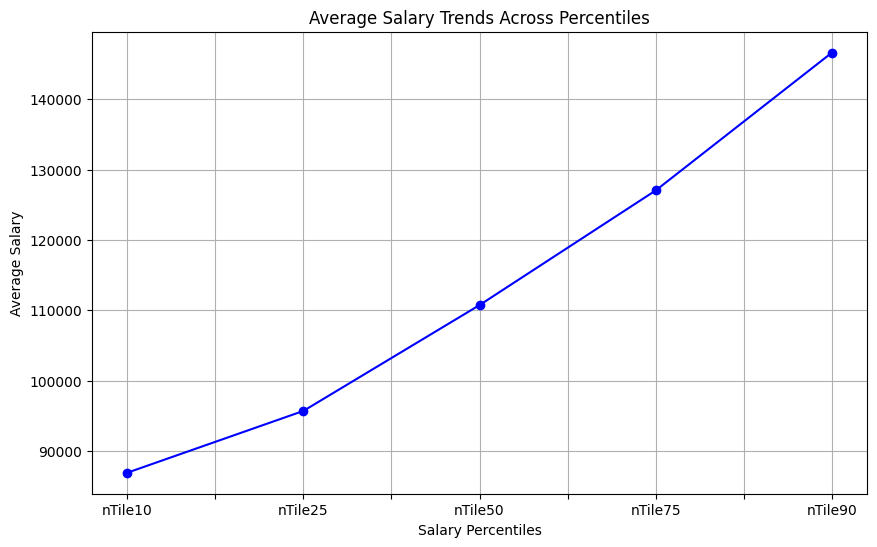

In [88]:
# Calculate average salary percentiles across the dataset
average_percentiles = df[percentiles].mean()
print(average_percentiles)

# Line plot to visualize trends
plt.figure(figsize=(10, 6))
average_percentiles.plot(kind='line', marker='o', color='blue')
plt.title("Average Salary Trends Across Percentiles")
plt.xlabel("Salary Percentiles")
plt.ylabel("Average Salary")
plt.grid()
plt.show()


#### Compare Categories


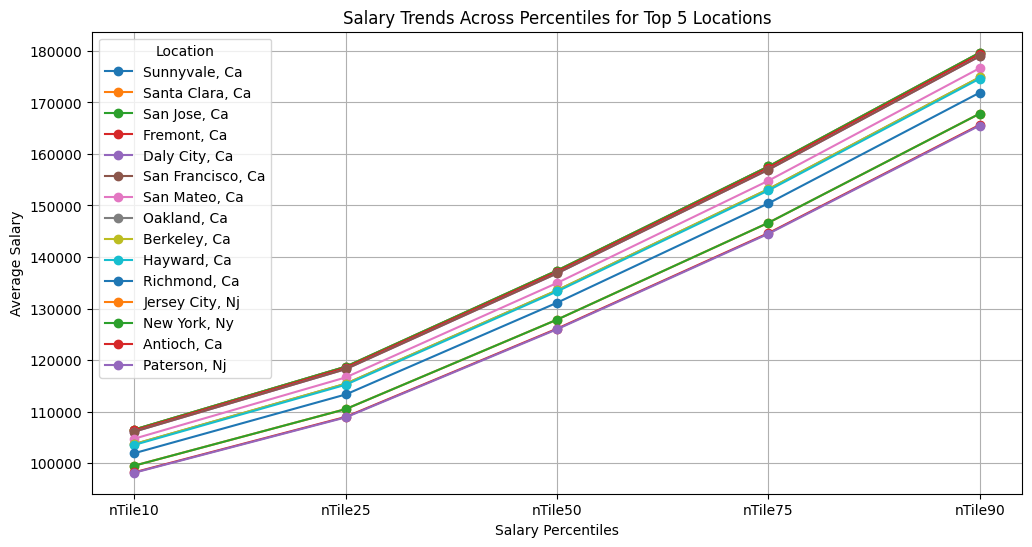

In [104]:
# Compare salary trends for the top 5 locations
top_15_locations = df.groupby('Job Location')['nTile50'].mean().sort_values(ascending=False).head(15).index
filtered_data = df[df['Job Location'].isin(top_15_locations)]

# Plot trends for top 5 locations
plt.figure(figsize=(12, 6))
for location in top_15_locations:
    subset = filtered_data[filtered_data['Job Location'] == location]
    plt.plot(percentiles, subset[percentiles].mean(), marker='o', label=location)

plt.title("Salary Trends Across Percentiles for Top 5 Locations")
plt.xlabel("Salary Percentiles")
plt.ylabel("Average Salary")
plt.legend(title="Location")
plt.grid()
plt.show()


In [109]:
# Calculate salary growth between nTile10 and nTile90 for each locatizzon
df['Salary Growth'] = df['nTile90'] - df['nTile10']

# Sort by Salary Growth
growth_sorted = df.sort_values(by='Salary Growth', ascending=False)
print(growth_sorted[['Job Location', 'Salary Growth']].head(10))


          Job Location  Salary Growth
774      Sunnyvale, Ca       252828.0
619       San Jose, Ca       252828.0
814    Santa Clara, Ca       252828.0
699        Fremont, Ca       252425.0
889      Daly City, Ca       251821.0
625  San Francisco, Ca       251821.0
896      San Mateo, Ca       248396.0
654        Oakland, Ca       245777.0
835       Berkeley, Ca       245777.0
765        Hayward, Ca       245374.0


#### Identifying High-Paying Locations or Job Titles

Top 10 High-Paying Locations:
Job Location
Sunnyvale, Ca        137370.8125
Santa Clara, Ca      137370.8125
San Jose, Ca         137370.8125
Fremont, Ca          137152.0000
Daly City, Ca        136823.5625
San Francisco, Ca    136823.5625
San Mateo, Ca        134962.8750
Oakland, Ca          133539.7500
Berkeley, Ca         133539.7500
Hayward, Ca          133321.0000
Name: nTile50, dtype: float64

Top 10 High-Paying Job Titles:
Job Title
Product Development Manager       143545.540984
Software Engineer                 138485.101639
Project Accounting Manager        137041.550820
Data Engineer                     134773.701639
Cloud Architect                   130936.744262
Marketing Manager                 125556.229508
Data Scientist                    124093.665574
Computer Vision Engineer          123666.249180
Analyst, Business Intelligence    113628.180328
Machine Learning Engineer         112889.777049
Name: nTile50, dtype: float64


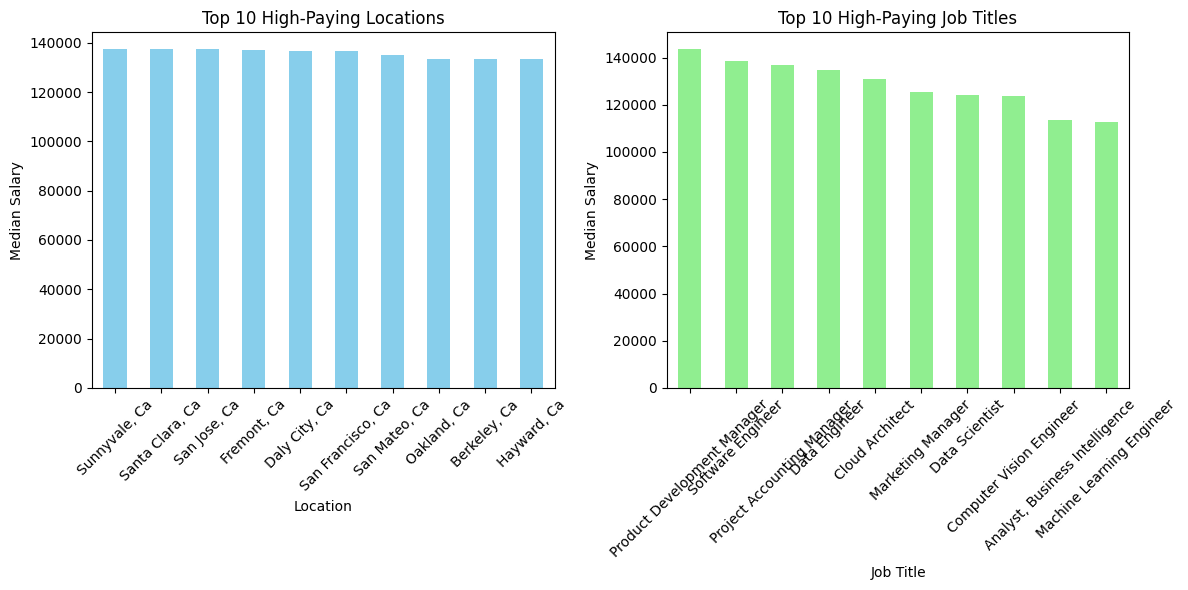

In [107]:
# Top 10 locations with the highest median salary
top_locations = df.groupby('Job Location')['nTile50'].mean().sort_values(ascending=False).head(10)
print("Top 10 High-Paying Locations:")
print(top_locations)

# Top 10 job titles with the highest median salary
top_job_titles = df.groupby('Job Title')['nTile50'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 High-Paying Job Titles:")
print(top_job_titles)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot for locations
plt.subplot(1, 2, 1)
top_locations.plot(kind='bar', color='skyblue')
plt.title("Top 10 High-Paying Locations")
plt.xlabel("Location")
plt.ylabel("Median Salary")
plt.xticks(rotation=45)

# Plot for job titles
plt.subplot(1, 2, 2)
top_job_titles.plot(kind='bar', color='lightgreen')
plt.title("Top 10 High-Paying Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Median Salary")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### Highlighting Salary Disparities Across Percentiles


Top 10 Locations with Largest Salary Disparity:
Job Location
Sunnyvale, Ca        73121.989617
Santa Clara, Ca      73121.989617
San Jose, Ca         73121.989617
Fremont, Ca          73011.614617
Daly City, Ca        72845.677117
San Francisco, Ca    72845.677117
San Mateo, Ca        71905.552117
Oakland, Ca          71186.864617
Berkeley, Ca         71186.864617
Hayward, Ca          71076.177117
Name: Salary Disparity, dtype: float64

Top 10 Job Titles with Largest Salary Disparity:
Job Title
Software Engineer                 203833.931148
Project Accounting Manager         80352.606557
Product Development Manager        76882.236066
Marketing Manager                  62589.524590
Natural Language Processing        59674.833880
Data Analyst                       55759.718033
Analyst, Business Intelligence     52867.632787
Data Engineer                      52436.278689
Cloud Architect                    49665.232787
Computer Vision Engineer           49164.357377
Name: Salary Dispar

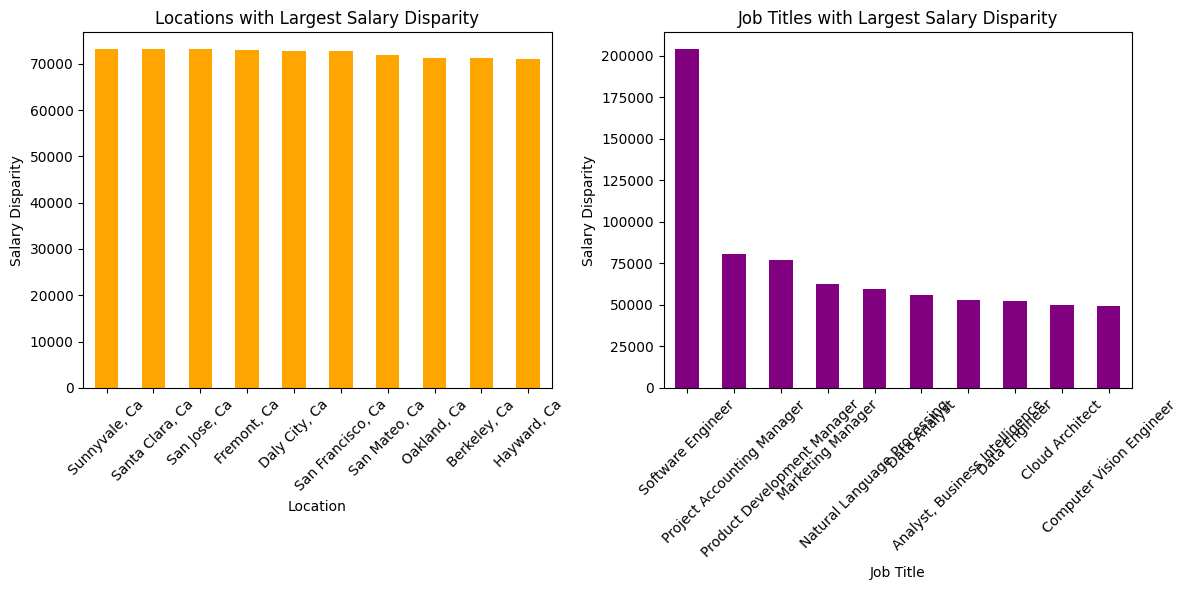

In [110]:
# Calculate salary disparity
df['Salary Disparity'] = df['nTile90'] - df['nTile10']

# Top 10 locations with the largest disparity
top_disparity_locations = df.groupby('Job Location')['Salary Disparity'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Locations with Largest Salary Disparity:")
print(top_disparity_locations)

# Top 10 job titles with the largest disparity
top_disparity_job_titles = df.groupby('Job Title')['Salary Disparity'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Job Titles with Largest Salary Disparity:")
print(top_disparity_job_titles)

# Visualization
plt.figure(figsize=(12, 6))

# Plot for locations
plt.subplot(1, 2, 1)
top_disparity_locations.plot(kind='bar', color='orange')
plt.title("Locations with Largest Salary Disparity")
plt.xlabel("Location")
plt.ylabel("Salary Disparity")
plt.xticks(rotation=45)

# Plot for job titles
plt.subplot(1, 2, 2)
top_disparity_job_titles.plot(kind='bar', color='purple')
plt.title("Job Titles with Largest Salary Disparity")
plt.xlabel("Job Title")
plt.ylabel("Salary Disparity")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


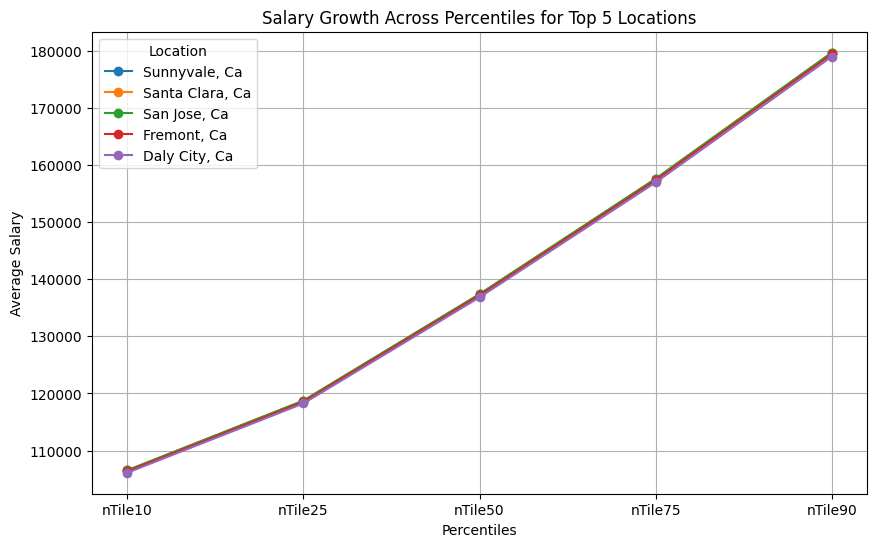

In [113]:
# Calculate average growth between percentiles for top locations
top_5_locations = top_locations.head(5).index
location_percentiles = df[df['Job Location'].isin(top_5_locations)]

# Plot salary growth trends
plt.figure(figsize=(10, 6))
for location in top_5_locations:
    subset = location_percentiles[location_percentiles['Job Location'] == location]
    plt.plot(percentiles, subset[percentiles].mean(), marker='o', label=location)

plt.title("Salary Growth Across Percentiles for Top 5 Locations")
plt.xlabel("Percentiles")
plt.ylabel("Average Salary")
plt.legend(title="Location")
plt.grid()
plt.show()
